In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = np.array([-1, 1, 2])
diff = np.diff(a)
v = np.concatenate([a[0:1], a]) + 1/2 * np.concatenate([-diff[0:1], diff, diff[-1:]])

In [3]:
def step_function(x, a):
    return np.sum((x[:, None] >= a[None, :]), axis=1)

([<matplotlib.axis.YTick at 0x2ddcb44a410>,
 [Text(0, 0, '0'), Text(0, 1, '1'), Text(0, 2, '2'), Text(0, 3, '3')])

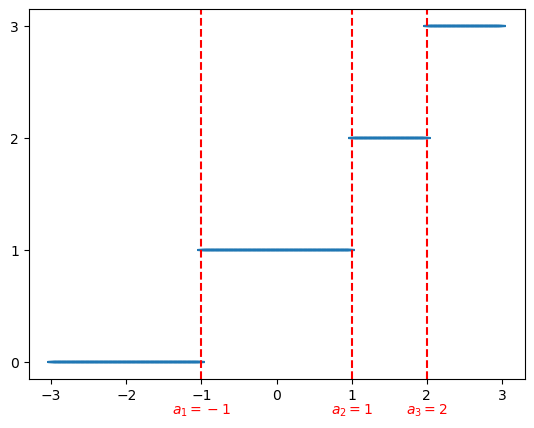

In [4]:
## Encoding function
x = np.linspace(-3, 3, 1000)
y = step_function(x, a)
plt.scatter(x, y, marker="_")
for f,thr in enumerate(a):
    plt.axvline(thr, color='red', linestyle='--')
    plt.text(thr, -0.5, f'${{a_{{{f+1}}}}} = {thr}$', color='red', ha='center', va='bottom')
plt.yticks([0, 1, 2,3])    

In [5]:
def decode_function(ind, a):
    diff = np.diff(a)
    v = np.concatenate([a[0:1], a]) + 1/2 * np.concatenate([-diff[0:1], diff, diff[-1:]])
    return v[ind]


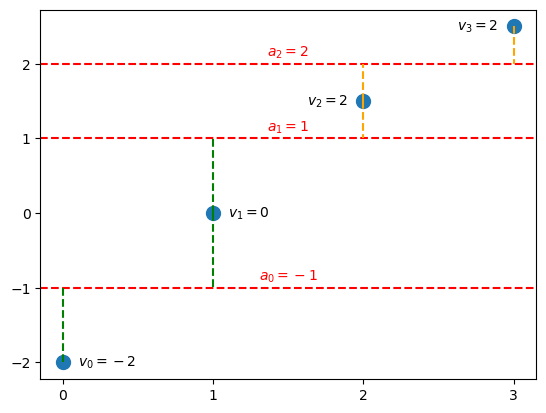

In [6]:
x = np.arange(0, 4)
y = decode_function(x, a)
plt.scatter(x, y, marker='o', s = 100)

for i, yi in enumerate(y):
    offset = 0.1 if i < 2 else -0.1
    ha = 'left' if i < 2 else 'right'
    plt.text(x[i] + offset, yi, f'$v_{{{i}}} = {yi:.0f}$', color='black', ha=ha, va='center')

plt.xticks(x)

for f,thr in enumerate(a):
    plt.axhline(thr, color='red', linestyle='--')
    plt.text(1.5, thr + 0.15, f'${{a_{{{f}}}}} = {thr}$', color='red', ha='center', va='center')

for i in range(len(a)+1):
    color = 'green' if i < 2 else 'orange'
    if i == 0:
        plt.plot([x[i], x[i]], [y[i], a[i]], color=color, linestyle='--')
    elif i == len(a):
        plt.plot([x[i], x[i]], [y[i], a[i-1]], color=color, linestyle='--')
    else:
        plt.plot([x[i], x[i]], [y[i], a[i-1]], color=color, linestyle='--')
        plt.plot([x[i], x[i]], [y[i], a[i]], color=color, linestyle='--')
        # plt.plot([x[i]-0.05, x[i]+0.05], [y[i], y[i]], color=color, linestyle='--')

    # for i, yi in enumerate(y):
    #     # Find the closest horizontal line (threshold) to each dot
    #     distances = np.abs(a - yi)
    #     closest_idx = np.argmin(distances)
    #     plt.plot([x[i], x[i]], [yi, a[closest_idx]], 'k--')
    #     plt.text(x[i]+0.05, (yi + a[closest_idx])/2, f'{distances[closest_idx]:.1f}', color='black', va='center')

In [7]:
#Quantization function
def quantize_function(x,a):
    ind = step_function(x, a)
    y = decode_function(ind, a)
    return y

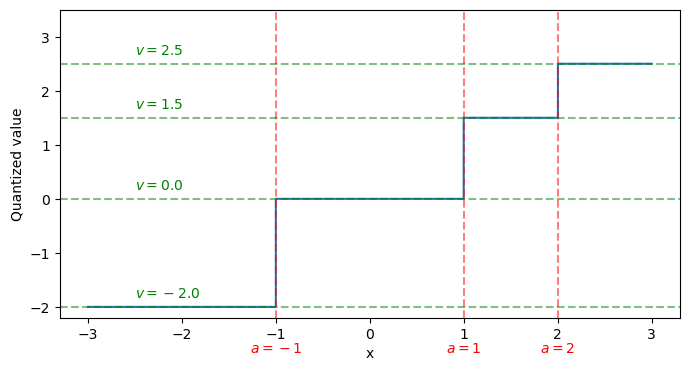

In [10]:
x_plot = np.linspace(-3, 3, 1000)
y_quant = quantize_function(x_plot, a)
min_val = np.min(y_quant)
max_val = np.max(y_quant)
plt.figure(figsize=(8, 4))
plt.plot(x_plot, y_quant, drawstyle='steps-post')
plt.xlabel('x')
plt.ylabel('Quantized value')
plt.ylim(min_val-0.2, max_val+1)
# plt.title('Quantization Function')
# plt.grid(True)
for thr in a:
    plt.axvline(thr, color='red', linestyle='--', alpha=0.5)
    plt.text(thr, min_val-0.9, f'${{a}} = {thr}$', color='red', ha='center', va='bottom')

for val in v:
    plt.axhline(val, color='green', linestyle='--', alpha=0.5)
    plt.text(-2.5, val + 0.25, f'${{v}} = {val}$', color='green', ha='left', va='center')

plt.show()